<a href="https://colab.research.google.com/github/ahmedmoustafa/Notebooks/blob/master/Obesity_By_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obesity By Country
---

![Overweight Adults](https://media.gettyimages.com/vectors/overweight-people-silhouettes-vector-id1124865328?s=2048x2048)

This [dataset](https://github.com/ahmedmoustafa/Notebooks/blob/master/data/WHO_Obesity_By_Country_2016.csv) contains the prevalence of obesity among adults (male, female, and combined) by country in 2016 from the World Health Organization's Global Health Observatory data repository risk factor Overweight/Obesity. Overweight here is defined as a body-mass index (BMI) ≥ 25.

**Q1**. How many rows and columns are in the dataset?

**Q2**. What are the estimates in Egypt?

**Q3**. What is the median prevalence of overweight males in each continent?

**Q4**. Which countries do have the prevalence of overweight males higher than overweight females?

**Q5**. Which countries do have the prevalence of overweight females higher than overweight males?

**Extra**: are the males and females percentages correlated? *Hint*: you can use the R function [`cor`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/cor) for [correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)?

---

To start, the data can be loaded using the following code:

In [2]:
library (tidyverse)
data = read_csv ("https://raw.githubusercontent.com/ahmedmoustafa/Notebooks/master/data/WHO_Obesity_By_Country_2016.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Continent = col_character(),
  Country = col_character(),
  Male = col_double(),
  Female = col_double(),
  Both = col_double()
)




In [3]:
glimpse(data)

Rows: 197
Columns: 5
$ Continent <chr> "Africa", "Africa", "Africa", "Africa", "Africa", "Africa",…
$ Country   <chr> "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "…
$ Male      <dbl> 19.4, 3.5, 4.2, 7.0, 2.2, 1.8, 5.2, 6.3, 3.2, 2.6, 3.0, 4.9…
$ Female    <dbl> 34.0, 10.0, 12.2, 25.5, 6.8, 7.0, 13.9, 14.9, 9.3, 7.0, 10.…
$ Both      <dbl> 26.6, 6.8, 8.2, 16.1, 4.5, 4.4, 9.5, 10.6, 6.3, 4.8, 6.9, 8…


In [4]:
data %>% filter (Country == "Egypt")

Continent,Country,Male,Female,Both
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Africa,Egypt,22,40,31.1


In [6]:
data %>% group_by(Continent) %>% summarise(med = median(Male))

`summarise()` ungrouping output (override with `.groups` argument)



Continent,med
<chr>,<dbl>
Africa,3.70
Asia,12.90
Europe,23.75
North America,16.50
Oceania,38.60
South America,17.90


In [9]:
data %>% filter (Male > Female)

Continent,Country,Male,Female,Both
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Asia,Japan,4.6,4.1,4.4
Europe,Austria,23.4,20.6,21.9
Europe,Belgium,25.1,23.9,24.5
Europe,Bulgaria,27.5,27.4,27.4
Europe,Denmark,23.7,18.9,21.3
Europe,Finland,25.7,24.2,24.9
Europe,France,23.5,23.0,23.2
Europe,Germany,26.6,24.9,25.7
Europe,Hungary,29.9,27.5,28.6


In [11]:
data %>% group_by (Country) %>% summarize(value= Male > Female) %>% filter (value == TRUE)

`summarise()` regrouping output by 'Country' (override with `.groups` argument)



Country,value
<chr>,<lgl>
Australia,TRUE
Austria,TRUE
Belgium,TRUE
Bulgaria,TRUE
Denmark,TRUE
Finland,TRUE
France,TRUE
Germany,TRUE
Hungary,TRUE


In [12]:
data %>% filter (Male < Female)

Continent,Country,Male,Female,Both
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Africa,Algeria,19.4,34.0,26.6
Africa,Angola,3.5,10.0,6.8
Africa,Benin,4.2,12.2,8.2
Africa,Botswana,7.0,25.5,16.1
Africa,Burkina Faso,2.2,6.8,4.5
Africa,Burundi,1.8,7.0,4.4
Africa,Cameroon,5.2,13.9,9.5
Africa,Cape Verde,6.3,14.9,10.6
Africa,Central African Republic,3.2,9.3,6.3


In [13]:
cor(data$Male, data$Female)

[1] 0.8991645

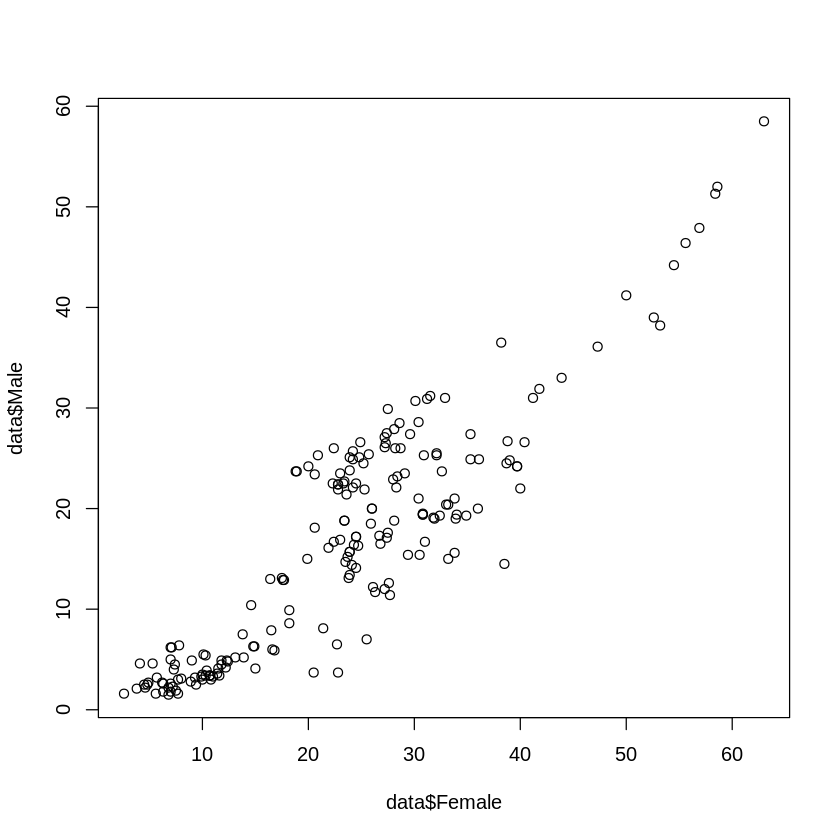

In [14]:
plot(data$Male ~ data$Female)

In [15]:
x = data$Male
head(x)

[1] 19.4  3.5  4.2  7.0  2.2  1.8

In [16]:
length(x)

[1] 197

In [17]:
y = data$Female
head(y)

[1] 34.0 10.0 12.2 25.5  6.8  7.0

In [18]:
cor(x, y)

[1] 0.8991645

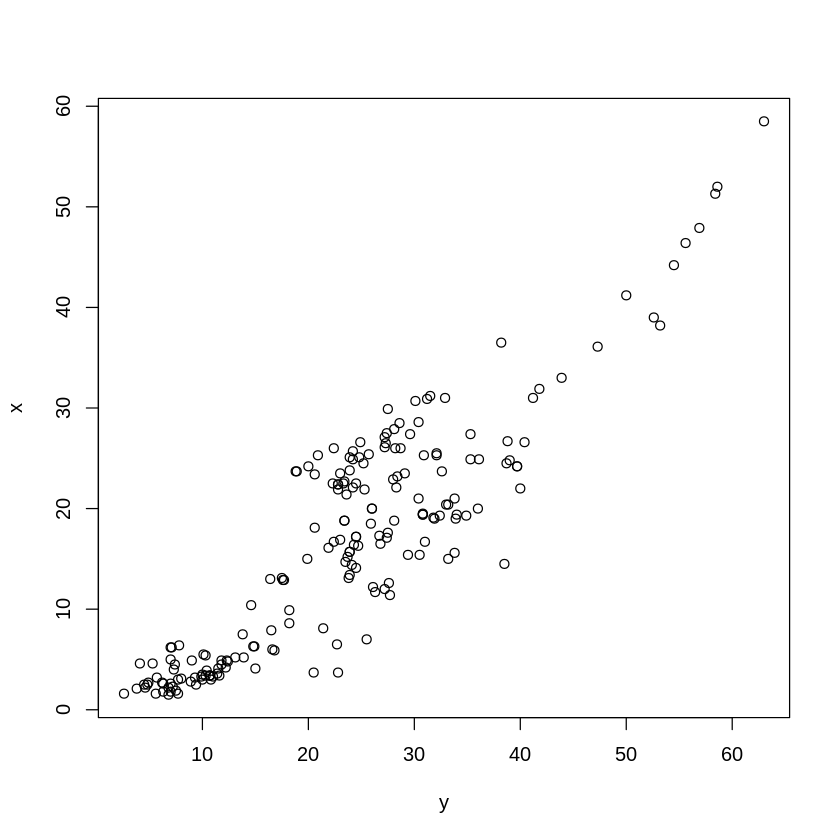

In [19]:
plot (x ~ y)

In [22]:
z = data %>% select (Male, Female, Both)
head(z)

Male,Female,Both
<dbl>,<dbl>,<dbl>
19.4,34.0,26.6
3.5,10.0,6.8
4.2,12.2,8.2
7.0,25.5,16.1
2.2,6.8,4.5
1.8,7.0,4.4


In [23]:
cor(z)

,Male,Female,Both
Male,1.0000000,0.8991645,0.971781
Female,0.8991645,1.0000000,0.975905
Both,0.9717810,0.9759050,1.000000
